Задание:

Проанализировать 6 временных рядов из папки Series и сделайть их стационарными.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

1. Загружаем 6 временных рядов

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [ ]:
def test_stationarity(timeseries, name):
    print(f'Results of Dickey-Fuller Test for {name}:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print()

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    #test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        y.plot(color='blue', label='Or')
        #plt.title(y.name)
        plt.tight_layout()
    return

2. Проводим тест Дики-Фуллера на необработанных данных для обнаружения рядов, которые изначально не отвергают гипотезу о стационарности ряда.

In [ ]:
for name, series in all_series.items():
  test_stationarity(series, name)

Results of Dickey-Fuller Test for Monthly sales of company X:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Results of Dickey-Fuller Test for Monthly Boston armed robberies:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

Results of Dickey-Fuller Test for International airline passengers: monthly totals in thousands:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.0

Значение p-value < 0.05 у временных рядов Daily total female births in California (0.000052) и Mean monthly air temperature (Deg. F) Nottingham Castle (0.016989). То есть у двух временных рядов гипотеза о стационарности сразу не отвергается, поэтому дальше они не рассматриваются.

3. Приведем к стационарности ряд Monthly sales of company X

Text(0.5, 1.0, 'Monthly sales of company X')

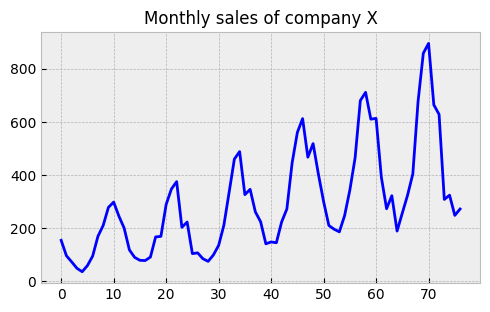

In [ ]:
tsplot(sales_of_company_x["Count"], figsize=(5, 3))
plt.title("Monthly sales of company X")

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Text(0.5, 1.0, 'Monthly sales of company X')

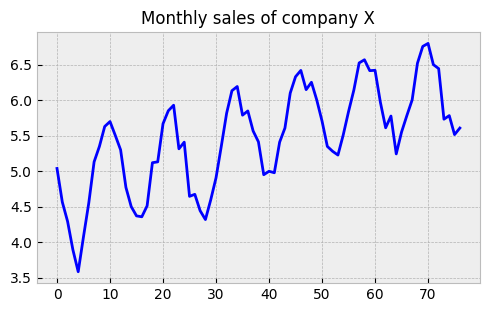

In [ ]:
stat_sales = boxcox(sales_of_company_x["Count"], 0)
tsplot(stat_sales, figsize=(5, 3))
plt.title("Monthly sales of company X")

In [ ]:
test_stationarity(stat_sales, name="Monthly sales of company X")

Results of Dickey-Fuller Test for Monthly sales of company X:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64



Избавимся от тренда при помощи дифференцирования

Results of Dickey-Fuller Test for Monthly sales of company X:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64



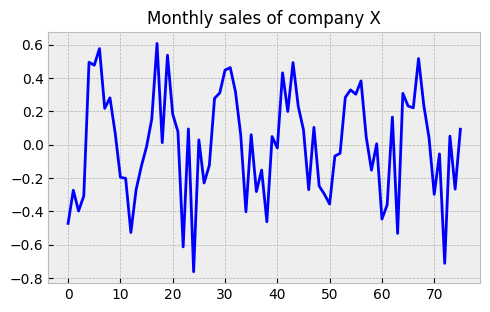

In [ ]:
stat_sales = np.diff(stat_sales, 1)
tsplot(stat_sales, figsize=(5, 3))
plt.title("Monthly sales of company X")
test_stationarity(stat_sales, name="Monthly sales of company X")

После проведенных преобразований p-value у ряда Monthly sales of company X стало 0.024025, что меньше 0.05. Теперь у ряда гипотеза о стационарности не отвергается.

4. Приведем к стационарности ряд Monthly Boston armed robberies

Text(0.5, 1.0, 'Monthly Boston armed robberies')

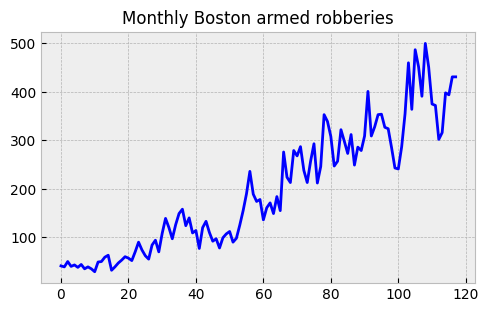

In [ ]:
tsplot(robberies_in_boston["Count"], figsize=(5, 3))
plt.title("Monthly Boston armed robberies")

Results of Dickey-Fuller Test for Monthly Boston armed robberies:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64



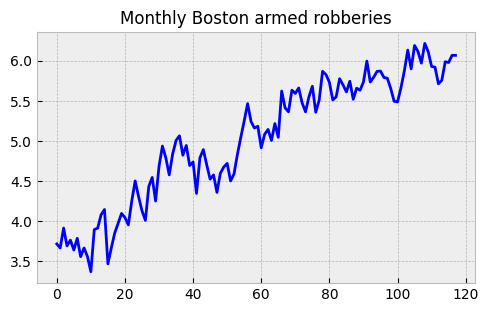

In [ ]:
stat_robberies = boxcox(robberies_in_boston["Count"], 0)
tsplot(stat_robberies, figsize=(5, 3))
plt.title("Monthly Boston armed robberies")
test_stationarity(stat_robberies, name="Monthly Boston armed robberies")

p-value все ещё недостаточно мал, поэтому избавимся от тренда при помощи дифференцирования.

Results of Dickey-Fuller Test for Monthly Boston armed robberies:
Test Statistic                -6.525581e+00
p-value                        1.016610e-08
#Lags Used                     1.300000e+01
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64



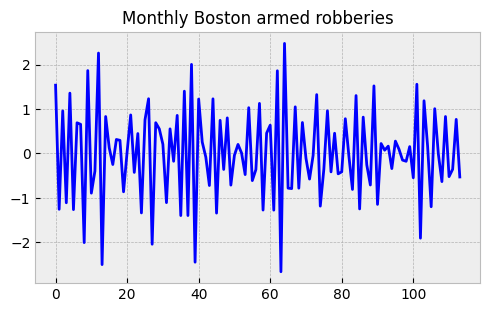

In [ ]:
stat_robberies = np.diff(stat_robberies, 1)
tsplot(stat_robberies, figsize=(5, 3))
plt.title("Monthly Boston armed robberies")
test_stationarity(stat_robberies, name="Monthly Boston armed robberies")

У ряда Monthly Boston armed robberies получили значение p-value = 0.00000001, следовательно, гипотеза о стационарности ряда не отвергается.

5. Приведем к стационарности ряд International airline passengers: monthly totals in thousands

Text(0.5, 1.0, 'International airline passengers: monthly totals in thousands')

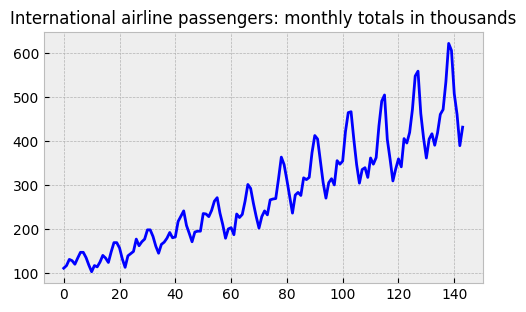

In [ ]:
tsplot(airlines_passengers["Count"], figsize=(5, 3))
plt.title("International airline passengers: monthly totals in thousands")

Results of Dickey-Fuller Test for International airline passengers: monthly totals in thousands:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64



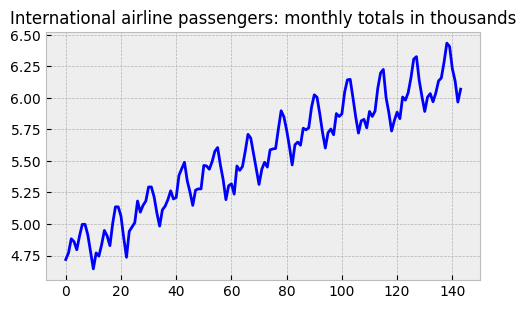

In [ ]:
stat_passengers = boxcox(airlines_passengers["Count"], 0)
tsplot(stat_passengers, figsize=(5, 3))
plt.title("International airline passengers: monthly totals in thousands")
test_stationarity(stat_passengers, name="International airline passengers: monthly totals in thousands")

Results of Dickey-Fuller Test for International airline passengers: monthly totals in thousands:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64



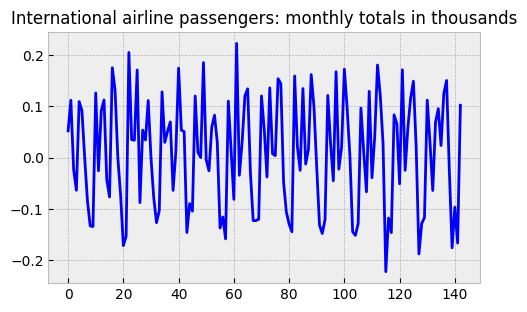

In [ ]:
stat_passengers = np.diff(stat_passengers, 1)
tsplot(stat_passengers, figsize=(5, 3))
plt.title("International airline passengers: monthly totals in thousands")
test_stationarity(stat_passengers, name="International airline passengers: monthly totals in thousands")

<Figure size 1600x600 with 0 Axes>

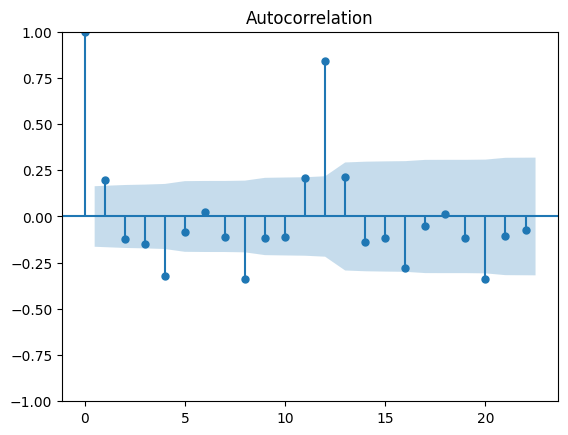

In [ ]:
stat_passengers1 = pd.Series(stat_passengers)
plt.figure(figsize=(16,6))
smt.graphics.plot_acf(stat_passengers1, lags=None, alpha=0.05)
plt.title("Autocorrelation")
plt.show()

После удаления тренда и уравнивания размаха дисперсии p-value всё еще > 0.05, поэтому необходимо убрать влияние сезонности, значение которой возьмем 12 (месяцев), опираясь на пик на графике коррелограммы.

Results of Dickey-Fuller Test for International airline passengers: monthly totals in thousands:
Test Statistic                -1.535607e+01
p-value                        3.665349e-28
#Lags Used                     1.300000e+01
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64



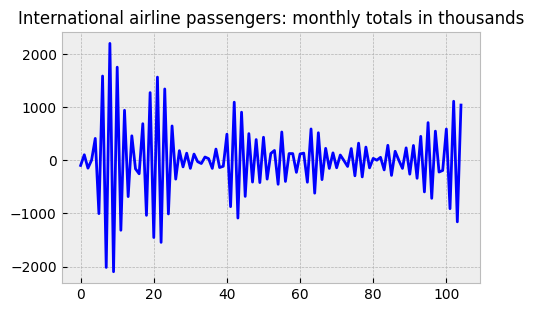

In [ ]:
stat_passengers = stat_passengers[12:] - stat_passengers[:-12]
tsplot(stat_passengers, figsize=(5, 3))
plt.title("International airline passengers: monthly totals in thousands")
test_stationarity(stat_passengers, name="International airline passengers: monthly totals in thousands")

Получили p-value = 3.66*10^(-28), что намного меньше 0.05. И теперь гипотеза о стационарности ряда не отвергается.

6. Приведем к стационарности ряд Weekly closings of the Dow-Jones industrial average

Text(0.5, 1.0, 'Weekly closings of the Dow-Jones industrial average')

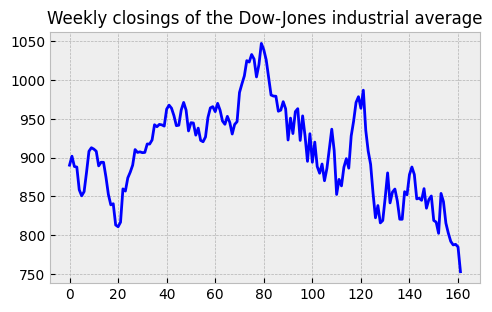

In [ ]:
tsplot(dowjones_closing["Close"], figsize=(5, 3))
plt.title("Weekly closings of the Dow-Jones industrial average")

Results of Dickey-Fuller Test for Weekly closings of the Dow-Jones industrial average:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64



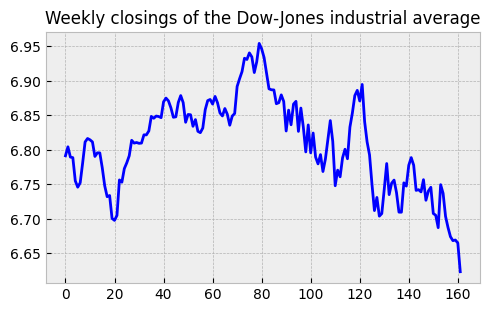

In [ ]:
stat_average = boxcox(dowjones_closing["Close"], 0)
tsplot(stat_average, figsize=(5, 3))
plt.title("Weekly closings of the Dow-Jones industrial average")
test_stationarity(stat_average, name="Weekly closings of the Dow-Jones industrial average")

Results of Dickey-Fuller Test for Weekly closings of the Dow-Jones industrial average:
Test Statistic                  -5.099378
p-value                          0.000014
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64



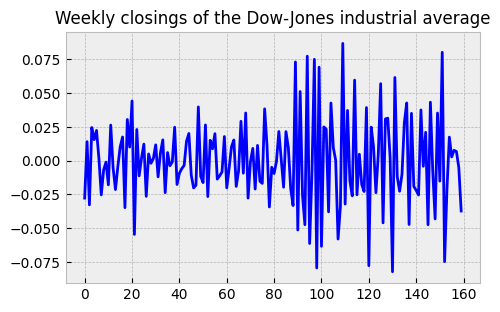

In [ ]:
stat_average = np.diff(stat_average, 1)
tsplot(stat_average, figsize=(5, 3))
plt.title("Weekly closings of the Dow-Jones industrial average")
test_stationarity(stat_average, name="Weekly closings of the Dow-Jones industrial average")

После проведенных преобразований p-value у ряда Weekly closings of the Dow-Jones industrial average стало 0.000014, что меньше 0.05. У ряда гипотеза о стационарности не отвергается.